# Using Energy Quantified Python Client

 1. Install
 2. Import and initialize
 3. Search for data (same as using the web app)
 4. Load time series data
 5. Pandas
 6. Plot
 

## Install

Use pip on the command line to install the `energyquantified` package from PyPI:

## Import and initialize

In [1]:
from energyquantified import EnergyQuantified

eq = EnergyQuantified(api_key='xxxxxxxx-xxxxxxxxxx-xxxxxxxxxxx-xxxxxxxxxx')  # <-- Insert your API key here

## Search for data

Use the `eq.metadata.curves`-function to search for data in the API. Here we are searching for wind power actual and forecasts.

In [2]:
# Search using free text
actual_curves = eq.metadata.curves(q='de wind prod act')

# Search by attributes
forecast_curves = eq.metadata.curves(area='DE', category=['Wind', 'Production'], data_type='Forecast')
actual_curves = eq.metadata.curves(area='DE', category=['Wind', 'Production'], data_type='Actual')

In [3]:
for curve in forecast_curves:
    print(repr(curve))

<Curve: "DE Wind Power Production MWh/h 15min Forecast", curve_type=INSTANCE>
<Curve: "DE Wind Power Production Medium-term MWh/h 15min Forecast", curve_type=INSTANCE>
<Curve: "DE Wind Power Production Offshore MWh/h 15min Forecast", curve_type=INSTANCE>
<Curve: "DE Wind Power Production Offshore Medium-term MWh/h 15min Forecast", curve_type=INSTANCE>
<Curve: "DE Wind Power Production Onshore MWh/h 15min Forecast", curve_type=INSTANCE>
<Curve: "DE Wind Power Production Onshore Medium-term MWh/h 15min Forecast", curve_type=INSTANCE>


In [4]:
for curve in actual_curves:
    print(repr(curve))

<Curve: "DE Wind Power Production MWh/h 15min Actual", curve_type=TIMESERIES>
<Curve: "DE Wind Power Production Offshore MWh/h 15min Actual", curve_type=TIMESERIES>
<Curve: "DE Wind Power Production Onshore MWh/h 15min Actual", curve_type=TIMESERIES>


## Load data

Load forecasts (instances) using the `eq.instance.*`-methods and time series using `eq.timeseries.load()`.

In [5]:
# Get dates
from datetime import date, timedelta
today = date.today()
tomorrow = today + timedelta(days=1)
ten_days_ago = today - timedelta(days=10)

# Get the four latest wind forecasts for the ECMWF forecast (tag = ec)
wind_forecasts = eq.instances.load(
    "DE Wind Power Production MWh/h 15min Forecast",
    tags=['ec', 'ec-ens'],
    limit=4
)

# Get the wind actuals
wind_actual = eq.timeseries.load(
    "DE Wind Power Production MWh/h 15min Actual",
    begin=ten_days_ago,
    end=tomorrow
)

In [6]:
wind_forecasts

[<Timeseries: resolution=<Resolution: frequency=PT15M, timezone=CET>, curve="DE Wind Power Production MWh/h 15min Forecast", instance=<Instance: issued="2021-01-22 00:00:00+00:00", tag="ec-ens">, begin="2021-01-22 01:00:00+01:00", end="2021-02-06 01:00:00+01:00">,
 <Timeseries: resolution=<Resolution: frequency=PT15M, timezone=CET>, curve="DE Wind Power Production MWh/h 15min Forecast", instance=<Instance: issued="2021-01-22 00:00:00+00:00", tag="ec">, begin="2021-01-22 01:00:00+01:00", end="2021-02-01 01:00:00+01:00">,
 <Timeseries: resolution=<Resolution: frequency=PT15M, timezone=CET>, curve="DE Wind Power Production MWh/h 15min Forecast", instance=<Instance: issued="2021-01-21 12:00:00+00:00", tag="ec-ens">, begin="2021-01-21 13:00:00+01:00", end="2021-02-05 13:00:00+01:00">,
 <Timeseries: resolution=<Resolution: frequency=PT15M, timezone=CET>, curve="DE Wind Power Production MWh/h 15min Forecast", instance=<Instance: issued="2021-01-21 12:00:00+00:00", tag="ec">, begin="2021-01-21

In [7]:
wind_actual

<Timeseries: resolution=<Resolution: frequency=PT15M, timezone=CET>, curve="DE Wind Power Production MWh/h 15min Actual", begin="2021-01-12 00:00:00+01:00", end="2021-01-22 14:45:00+01:00">

## Convert to Pandas dataframe

First off, make sure you have **pandas** installed.

You can convert any of Energy Quantified's time series' to Pandas DataFrames by invoking `timeseries.to_dataframe()`.

To convert multiple at once, and to easily align them, import our `TimeseriesList`, add all time series to it (using the same methods as in the default Python list), and invoke `list.to_dataframe()`:

In [8]:
# Import the TimeseriesList utility from EQ
from energyquantified.data import TimeseriesList

# Create a list, add the wind actual, and add 
# all the wind forecasts
timeseries_list = TimeseriesList()
timeseries_list.append(wind_actual)
for forecast in wind_forecasts:
    timeseries_list.append(forecast)

# Convert to Pandas DataFrame
df = timeseries_list.to_dataframe()

In [9]:
# Print the dataframe
df

DE Wind Power Production MWh/h 15min Actual  \
                                                                        
                                                                        
date                                                                    
2021-01-12 00:00:00+01:00                                     37411.0   
2021-01-12 00:15:00+01:00                                     38393.0   
2021-01-12 00:30:00+01:00                                     38479.0   
2021-01-12 00:45:00+01:00                                     38999.0   
2021-01-12 01:00:00+01:00                                     39031.0   
...                                                               ...   
2021-02-05 23:45:00+01:00                                         NaN   
2021-02-06 00:00:00+01:00                                         NaN   
2021-02-06 00:15:00+01:00                                         NaN   
2021-02-06 00:30:00+01:00                                         NaN   
2021-02-06 00:45:00+01:00                                         NaN   

                          DE Wind Power Production MWh/h 15min Forecast  \
                                                2021-01-22 00:00 ec-ens   
                                                                          
date                                                                      
2021-01-12 00:00:00+01:00                                           NaN   
2021-01-12 00:15:00+01:00                                           NaN   
2021-01-12 00:30:00+01:00                                           NaN   
2021-01-12 00:45:00+01:00                                           NaN   
2021-01-12 01:00:00+01:00                                           NaN   
...                                                                 ...   
2021-02-05 23:45:00+01:00                                       12880.3   
2021-02-06 00:00:00+01:00                                       12846.4   
2021-02-06 00:15:00+01:00                                       12833.5   
2021-02-06 00:30:00+01:00                                       12820.2   
2021-02-06 00:45:00+01:00                                       12821.7   

                                                                       \
                          2021-01-22 00:00 ec 2021-01-21 12:00 ec-ens   
                                                                        
date                                                                    
2021-01-12 00:00:00+01:00                 NaN                     NaN   
2021-01-12 00:15:00+01:00                 NaN                     NaN   
2021-01-12 00:30:00+01:00                 NaN                     NaN   
2021-01-12 00:45:00+01:00                 NaN                     NaN   
2021-01-12 01:00:00+01:00                 NaN                     NaN   
...                                       ...                     ...   
2021-02-05 23:45:00+01:00                 NaN                     NaN   
2021-02-06 00:00:00+01:00                 NaN                     NaN   
2021-02-06 00:15:00+01:00                 NaN                     NaN   
2021-02-06 00:30:00+01:00                 NaN                     NaN   
2021-02-06 00:45:00+01:00                 NaN                     NaN   

                                               
                          2021-01-21 12:00 ec  
                                               
date                                           
2021-01-12 00:00:00+01:00                 NaN  
2021-01-12 00:15:00+01:00                 NaN  
2021-01-12 00:30:00+01:00                 NaN  
2021-01-12 00:45:00+01:00                 NaN  
2021-01-12 01:00:00+01:00                 NaN  
...                                       ...  
2021-02-05 23:45:00+01:00                 NaN  
2021-02-06 00:00:00+01:00                 NaN  
2021-02-06 00:15:00+01:00                 NaN  
2021-02-06 00:30:00+01:00                 NaN  
2021-02-06 00:45:00+01:00           

## Plotting data

The easiest way to plot data is to use `pandas.DataFrame.plot()`:

<AxesSubplot:xlabel='date'>

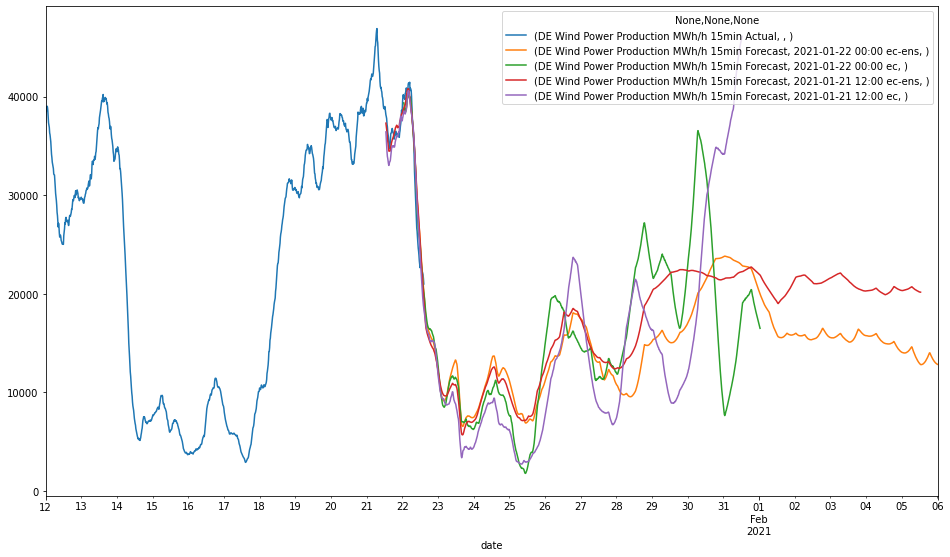

In [10]:
df.plot(figsize=(16, 9))